In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

In [25]:
data=pd.read_csv("C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [26]:
import pandas as pd
# Summary statistics
print(data.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

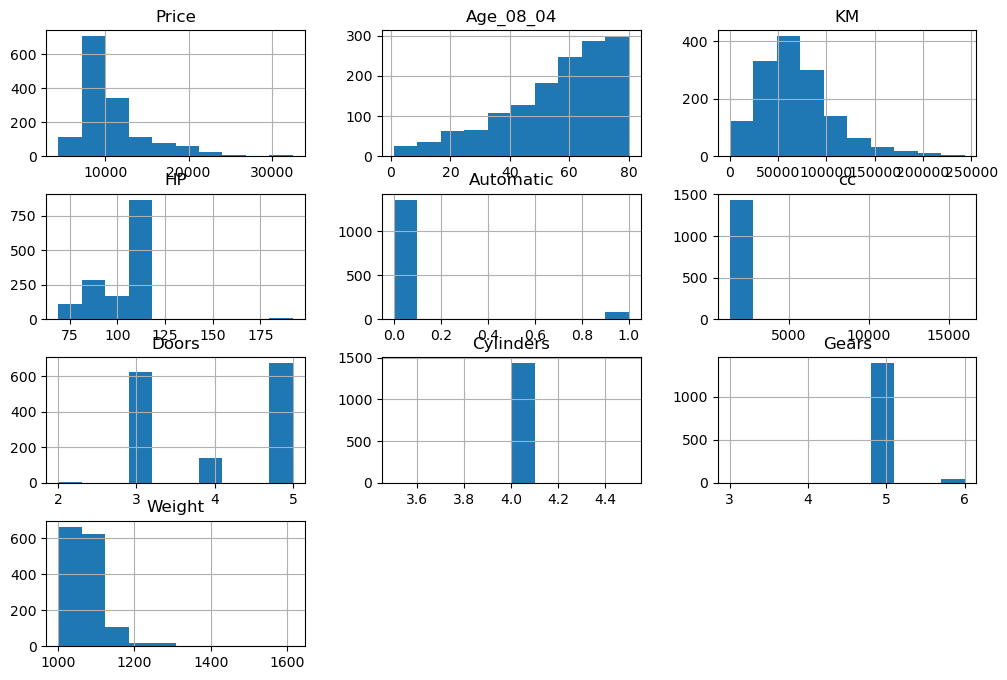

In [27]:
# Histograms for numerical variables
data.hist(figsize=(12, 8))

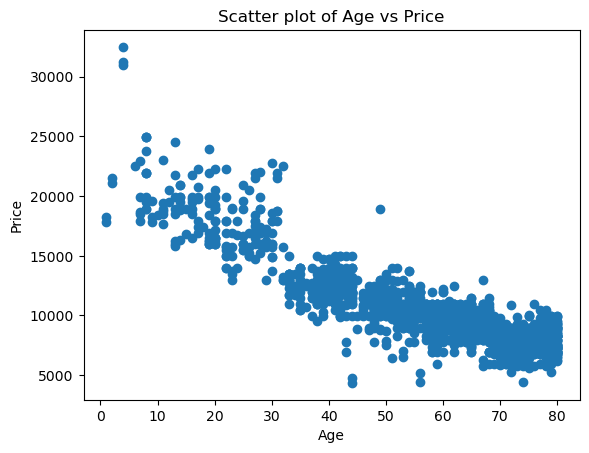

In [28]:
# Scatter plots for relationships between variables
import matplotlib.pyplot as plt
plt.scatter(data['Age_08_04'], data['Price']) # Changed 'Age' to 'Age_08_04'
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter plot of Age vs Price')
plt.show()


In [29]:
# Correlation matrix
# Convert 'Fuel_Type' columns to numeric type before calculating correlation
for col in data.columns:
   if 'Fuel_Type' in col:
     data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.corr())

              Price  Age_08_04        KM  Fuel_Type        HP  Automatic  \
Price      1.000000  -0.876590 -0.569960        NaN  0.314990   0.033081   
Age_08_04 -0.876590   1.000000  0.505672        NaN -0.156622   0.031717   
KM        -0.569960   0.505672  1.000000        NaN -0.333538  -0.081854   
Fuel_Type       NaN        NaN       NaN        NaN       NaN        NaN   
HP         0.314990  -0.156622 -0.333538        NaN  1.000000   0.013144   
Automatic  0.033081   0.031717 -0.081854        NaN  0.013144   1.000000   
cc         0.126389  -0.098084  0.102683        NaN  0.035856   0.066740   
Doors      0.185326  -0.148359 -0.036197        NaN  0.092424  -0.027654   
Cylinders       NaN        NaN       NaN        NaN       NaN        NaN   
Gears      0.063104  -0.005364  0.015023        NaN  0.209477  -0.098555   
Weight     0.581198  -0.470253 -0.028598        NaN  0.089614   0.057249   

                 cc     Doors  Cylinders     Gears    Weight  
Price      0.126389  0.1

In [30]:

# Preprocessing
# Example: Handling missing values
data.fillna(data.mean(), inplace=True)

# Example: Encoding categorical variables
# This code is no longer needed since the columns were converted in a previous step.
# data = pd.get_dummies(data, columns=['Fuel_Type', 'Color'])

In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the target variable
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Explanation:
# - train_test_split function from sklearn.model_selection is used to split the data.
# - test_size=0.2 specifies that 20% of the data will be used for testing.
# - random_state=42 ensures that the split is reproducible.
# - The function returns two DataFrames: train_data (80% of the data) and test_data (20% of the data).


In [32]:
X_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
899,62,59295,NaN,86,0,1300,5,4,5,1035
881,68,61568,NaN,110,0,1600,4,4,5,1035
310,40,38653,NaN,110,0,1600,5,4,5,1080
1145,75,101855,NaN,110,0,1600,5,4,5,1070
31,22,35199,NaN,97,0,1400,3,4,5,1100
...,...,...,...,...,...,...,...,...,...,...
1095,76,125778,NaN,110,0,1600,3,4,5,1050
1130,73,107108,NaN,110,0,1600,3,4,5,1050
1294,80,71740,NaN,110,0,1600,5,4,5,1070
860,63,64690,NaN,86,0,1300,3,4,5,1020


In [33]:
# Model 1: All features
model1 = LinearRegression()
# Create an imputer object and fit it on X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
model1.fit(X_train_imputed, y_train)

print('\nModel 1 Coefficients:')
# Change X_train.columns to X_train_imputed.shape[1] to iterate over the correct number of features
for i in range(X_train_imputed.shape[1]):
  print(f'{i}: {model1.coef_[i]}')



Model 1 Coefficients:
0: -120.78313654181905
1: -0.019986273170814615
2: 27.429109893649457
3: 371.2087031810055
4: -0.11351355874884583
5: 7.5354677765531095
6: 2.2168933355715126e-12
7: 626.4184437879996
8: 19.84313827080288


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Fuel_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [34]:
# Model 1: All features
model1 = LinearRegression()
# Create an imputer object and fit it on X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
model1.fit(X_train_imputed, y_train)

print('\nModel 1 Coefficients:')
# Iterate through the columns of X_train_imputed (the data the model was trained on)
for i, col in enumerate(X_train.columns[:-1]): # Exclude the last column ('Price')
  print(f'{col}: {model1.coef_[i]}')






Model 1 Coefficients:
Age_08_04: -120.78313654181905
KM: -0.019986273170814615
Fuel_Type: 27.429109893649457
HP: 371.2087031810055
Automatic: -0.11351355874884583
cc: 7.5354677765531095
Doors: 2.2168933355715126e-12
Cylinders: 626.4184437879996
Gears: 19.84313827080288


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Fuel_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [35]:
# Model 2: Selected features (Age, KM, HP, Weight)
model2 = LinearRegression()
X_train2 = X_train[['Age_08_04', 'KM', 'HP', 'Weight']]
model2.fit(X_train2, y_train)

print('\nModel 2 Coefficients:')
for i, col in enumerate(X_train2.columns):
  print(f'{col}: {model2.coef_[i]}')


Model 2 Coefficients:
Age_08_04: -120.02540542943407
KM: -0.02023259195297128
HP: 29.05217038638872
Weight: 19.76906620722093


In [36]:
# Model 3: Selected features (Age, KM, Fuel_Type)
model3 = LinearRegression()
X_train3 = X_train[['Age_08_04', 'KM', 'Fuel_Type']]
# Create a new imputer object specifically for X_train3 and fit it on X_train3
imputer = SimpleImputer(strategy='mean')
X_train3_imputed = imputer.fit_transform(X_train3)

model3.fit(X_train3_imputed, y_train)

print('\nModel 3 Coefficients:')
# Iterate through the columns of X_train3_imputed (the data the model was trained on)
for i, col in enumerate(X_train3.columns[:-1]): # Exclude the last column ('Fuel_Type') as it was imputed
  print(f'{col}: {model3.coef_[i]}')


Model 3 Coefficients:
Age_08_04: -153.01546943924146
KM: -0.016113725570708122


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Fuel_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [37]:
# Model 1 Evaluation
X_test = test_data.drop('Price', axis=1)
y_test = test_data['Price']

# Create a new imputer object for X_test and fit it on X_test
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

y_pred1 = model1.predict(X_test_imputed)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print('\nModel 1 Evaluation:')
print('Mean Squared Error:', mse1)
print('R-squared:', r2_1)



Model 1 Evaluation:
Mean Squared Error: 1970126.6288130234
R-squared: 0.8523452141908858


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Fuel_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [38]:
# Model 2 Evaluation
X_test2 = test_data[['Age_08_04', 'KM', 'HP', 'Weight']] # Use the correct features for model2
y_pred2 = model2.predict(X_test2)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print('\nModel 2 Evaluation:')
print('Mean Squared Error:', mse2)
print('R-squared:', r2_2)




Model 2 Evaluation:
Mean Squared Error: 1993321.0129730718
R-squared: 0.8506068681500581


In [39]:
# Model 3 Evaluation
X_test3 = test_data[['Age_08_04', 'KM', 'Fuel_Type']] # Use the correct features for model3

# Create a new imputer object specifically for X_test3 and fit it on X_test3
imputer = SimpleImputer(strategy='mean')
X_test3_imputed = imputer.fit_transform(X_test3)

y_pred3 = model3.predict(X_test3_imputed)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print('\nModel 3 Evaluation:')
print('Mean Squared Error:', mse3)
print('R-squared:', r2_3)


Model 3 Evaluation:
Mean Squared Error: 2925606.602783666
R-squared: 0.7807349994776657


C:\Users\NANDAKISHORE BOINI\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Fuel_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [40]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X_train_imputed, y_train)
y_pred_lasso = lasso.predict(X_test_imputed)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('\nLasso Regression:')
print('Mean Squared Error:', mse_lasso)
print('R-squared:', r2_lasso)




Lasso Regression:
Mean Squared Error: 1970167.545659507
R-squared: 0.8523421476021117


In [41]:
# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge.fit(X_train_imputed, y_train)
y_pred_ridge = ridge.predict(X_test_imputed)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('\nRidge Regression:')
print('Mean Squared Error:', mse_ridge)
print('R-squared:', r2_ridge)



Ridge Regression:
Mean Squared Error: 1970151.833724146
R-squared: 0.8523433251621815


In [42]:
#1.What is Normalization & Standardization and how is it helpful?

#Normalization is also known as min-max scaling,it is to bring the features in the range of 0 to 1.
#It arranges our diifferent measures of data into single scalable data.it has a very high chance of outliers.
#the calculative formula is Xn=(X-Xmin)/(Xmax-Xmin)

#Standardization is known Z-score normalization,it calculates on the basis of mean and std.deviation
#It converts our data into mean of 0 and standard deviation 1.
#it's mathematical formula is Xn=(X-Xmean)/Xstd

#both normalization and standardization improves the working of the model.
#they both also prevent the dominance of the large scale data.
#by the help of these methods,scaling can also be done to converge the algorithms 

In [43]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?

#Multicollinearity takes place because of predicted variables are highly correlated
#it will lead to difficulty in interpreting the feature importance
#also causes in unstableness in coefficient estimates

#techniques used:
#Feature selection-by removing highly correlated variables
#Feature engineering-linearly combinig the predictors
#Dimensinality reduction-principal component analysis(PCA),partial least squares regression(PLS).
#regualrization and variance inflation facter(vif)